In [383]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter # this is for outlier detection

In [384]:
df = pd.read_csv(r'C:\Users\aan06\2025 Machine Learning\Healthcare Insurance Cost Insurance\insurance.csv')

In [385]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
5,-31.0,woman,25.740,0.0,no,southeast,$3756.6216
6,46.0,woman,33.440,1.0,no,southeast,8240.5896
7,37.0,female,27.740,3.0,no,Northwest,7281.5056
8,37.0,male,29.830,2.0,no,Northeast,$6406.4107
9,60.0,female,25.840,0.0,no,northwest,28923.13692


In [386]:
df.shape

(1338, 7)

In [387]:
df.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


In [388]:
df.isnull().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [390]:
# data clearning up
df= df.dropna()

In [391]:
df.shape

(1208, 7)

In [392]:
#categorical features: standarized categories
df['region'] = df['region'].str.lower()

In [393]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [394]:
df['region'].value_counts()

region
southeast    322
southwest    297
northeast    295
northwest    294
Name: count, dtype: int64

In [395]:
df['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [396]:
gender_dic = {'woman':'female', 'F':'female', 'man':'male', 'M':'male'}

df['sex'] = df['sex'].replace(gender_dic)

In [397]:
df['sex'].value_counts()

sex
male      613
female    595
Name: count, dtype: int64

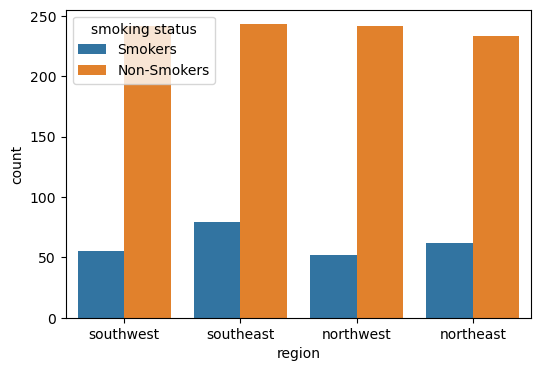

In [398]:
#relationship between region and smoker

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='region', hue='smoker')

plt.legend(title='smoking status', labels=['Smokers', 'Non-Smokers'])
plt.show()

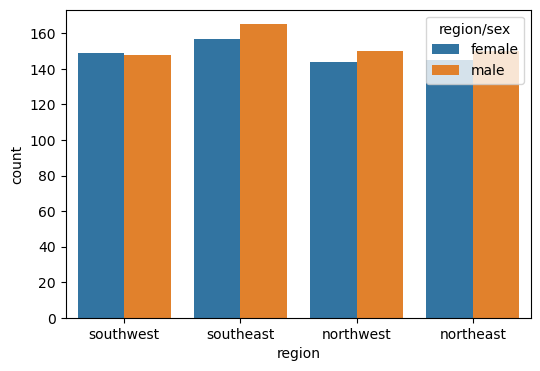

In [406]:
#relationship between region and sex


plt.figure(figsize=(6,4))

sns.countplot(data=df, x='region', hue='sex')

plt.legend(title='region/sex', labels=['female', 'male'])
plt.show()

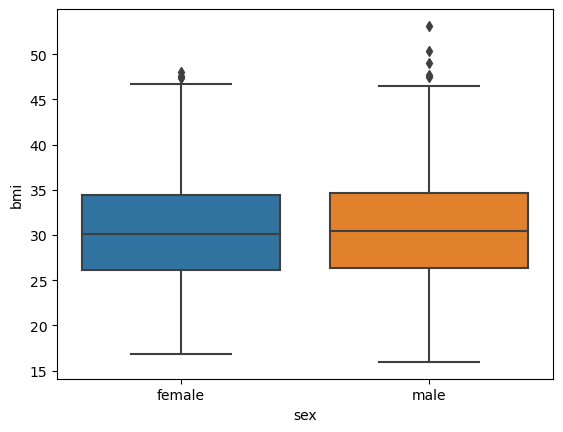

In [400]:
sns.boxplot(x='sex', y='bmi', data=df)
plt.show()

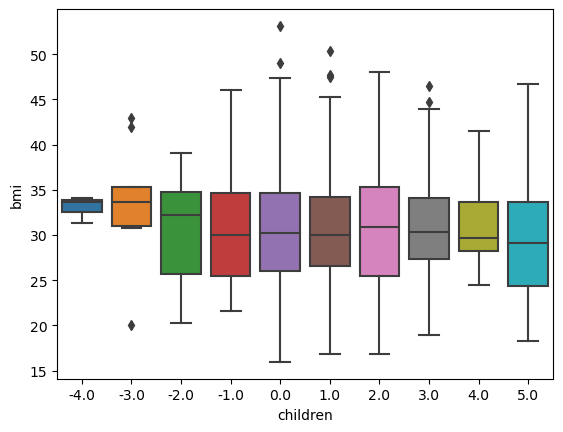

In [407]:
# relationship between children and BMI

sns.boxplot(data=df, x='children', y='bmi')
plt.show()

In [408]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'female' else 0)

In [409]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [410]:
df['smoker'].value_counts()

smoker
0    960
1    248
Name: count, dtype: int64

In [411]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,1,southwest,16884.924
1,18.0,0,33.770,1.0,0,southeast,1725.5523
2,28.0,0,33.000,3.0,0,southeast,$4449.462
3,33.0,0,22.705,0.0,0,northwest,$21984.47061
4,32.0,0,28.880,0.0,0,northwest,$3866.8552
5,-31.0,1,25.740,0.0,0,southeast,$3756.6216
6,46.0,1,33.440,1.0,0,southeast,8240.5896
7,37.0,1,27.740,3.0,0,northwest,7281.5056
8,37.0,0,29.830,2.0,0,northeast,$6406.4107
9,60.0,1,25.840,0.0,0,northwest,28923.13692


In [412]:
df['charges']= df['charges'].str.replace('$','').astype(float)

In [413]:
df['charges'].sample(30)

266     17179.52200
1001    34472.84100
301     24873.38490
369      3481.86800
145      5138.25670
1082     5855.90250
40       3046.06200
1180     7650.77375
497      8027.96800
1198     6393.60345
116     11381.32540
1111    41949.24410
261     17085.26760
345      6184.29940
514     21082.16000
915      2473.33410
19      36837.46700
1278    22462.04375
864      8782.46900
155      6948.70080
1236    14449.85440
922      5488.26200
37       2302.30000
496      4931.64700
577     58571.07448
939      9487.64420
201      8871.15170
1116     9222.40260
1329    10325.20600
1315    11272.33139
Name: charges, dtype: float64

In [414]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     1
dtype: int64

In [415]:
row= df[df['charges'].isnull()].index
print(row)

Index([670], dtype='int64')


In [416]:
df = df.drop(row)

In [417]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [418]:
df.shape

(1207, 7)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1207 non-null   float64
 1   sex       1207 non-null   int64  
 2   bmi       1207 non-null   float64
 3   children  1207 non-null   float64
 4   smoker    1207 non-null   int64  
 5   region    1207 non-null   object 
 6   charges   1207 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 75.4+ KB


In [420]:
import matplotlib.pyplot as plt

df1 = df.copy()


In [421]:
age_below = df.query('age < 0')
#how many rows age below 0
age_below.shape[0]

58

In [422]:
child_below_zero = df.query('children <0')
child_below_zero.shape[0]

42

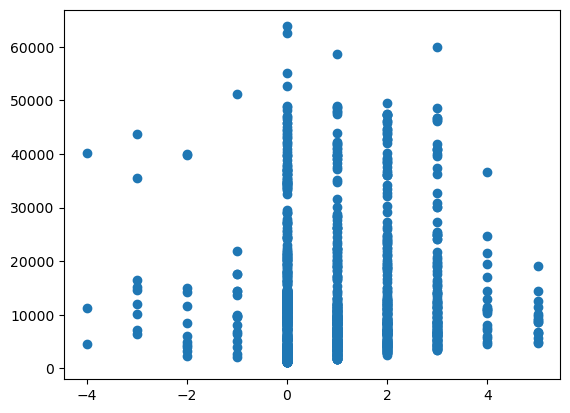

In [423]:
plt.scatter(df['children'],df['charges'])

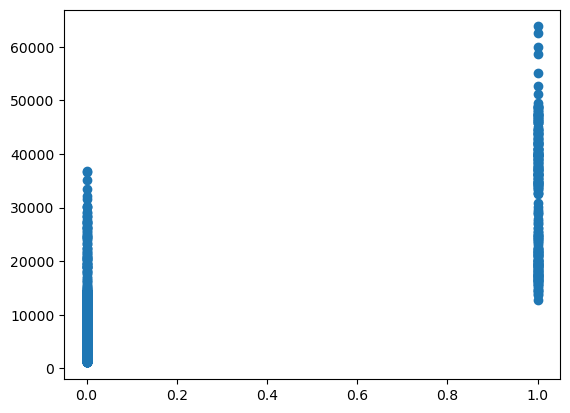

In [424]:
plt.scatter(df['smoker'],df['charges'])

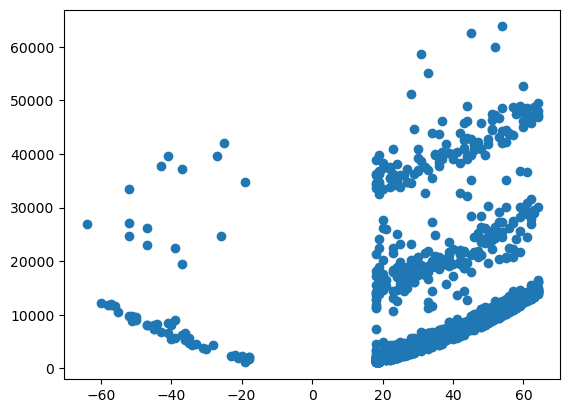

In [425]:
plt.scatter(df['age'],df['charges'])

In [426]:
df['age'] = df['age'].apply(lambda x: abs(x) if x <0 else x)

In [427]:
df['children'] = df['children'].apply(lambda x: abs(x) if x <0 else x)

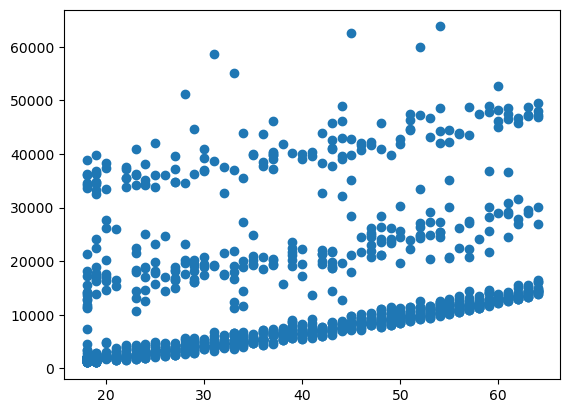

In [428]:
plt.scatter(df['age'],df['charges'])

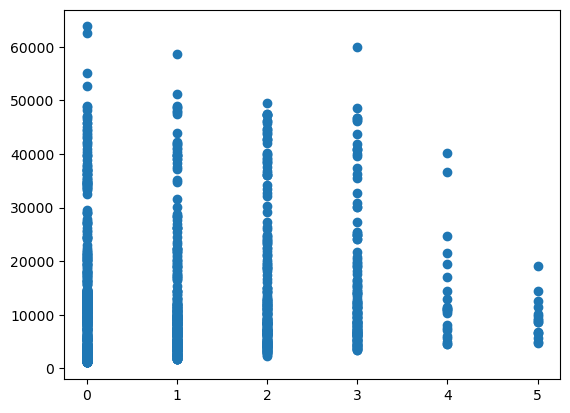

In [429]:
plt.scatter(df['children'],df['charges'])

In [430]:
df[['sex', 'charges']].groupby('sex').mean('charges').reset_index()

,sex,charges
0,0,13922.260558
1,1,12682.830577


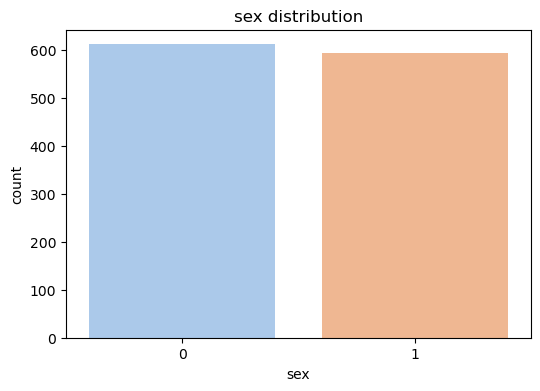

In [431]:
# countplot for sex count 
# female == 1, male == 0
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('sex distribution')
plt.show()

Text(0.5, 0, 'sex')

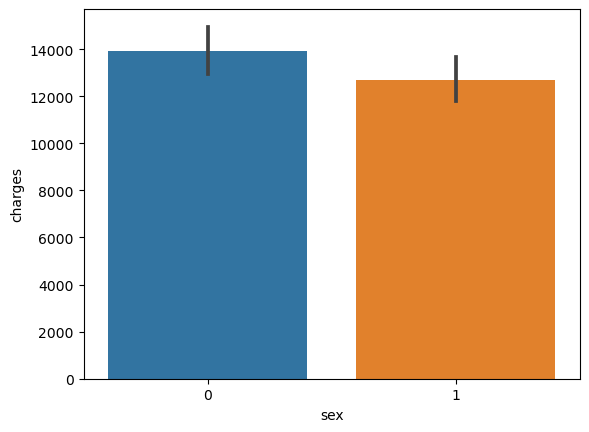

In [432]:
sns.barplot(x='sex', y='charges', data=df)
plt.ylabel('charges')
plt.xlabel('sex')

In [433]:
df[['bmi', 'charges']].groupby('bmi').mean('charges').sort_values(by=['charges','bmi'],ascending=[False,False]).reset_index()

,bmi,charges
0,47.41,63770.42801
1,30.36,62592.87309
2,36.40,51194.55914
3,36.96,49577.66240
4,37.70,48824.45000
...,...,...
523,35.40,1263.24900
524,20.70,1242.81600
525,20.30,1242.26000
526,53.13,1163.46270


Text(0.5, 1.0, 'bmi distribution')

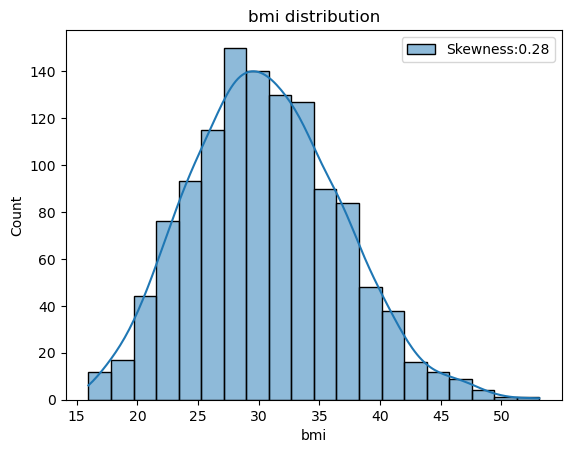

In [434]:
#check bmi distribution

skewness=df['bmi'].skew()
sns.histplot(df['bmi'], kde=True, label=f'Skewness:{skewness:.2f}', bins=20)
plt.legend(loc='best')
plt.title('bmi distribution')

Text(0.5, 1.0, 'age distribution')

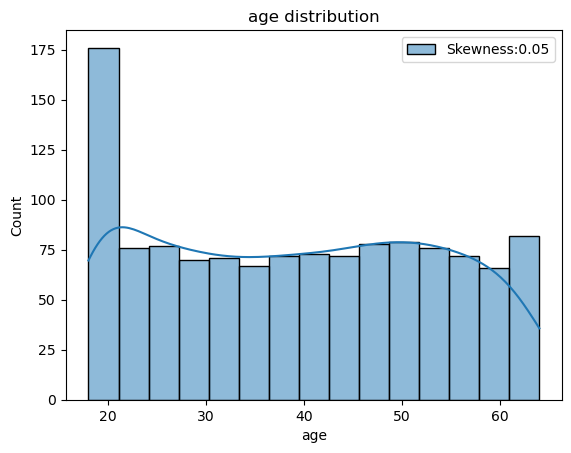

In [435]:
#check age distribution

skewness=df['age'].skew()
sns.histplot(df['age'], kde=True, label=f'Skewness:{skewness:.2f}', bins=15)
plt.legend(loc='best')
plt.title('age distribution')

Text(0.5, 1.0, 'smoker distribution')

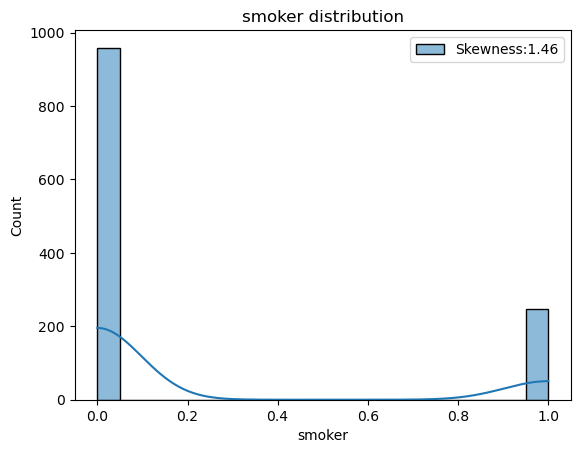

In [436]:
#check bmi distribution

skewness=df['smoker'].skew()
sns.histplot(df['smoker'], kde=True, label=f'Skewness:{skewness:.2f}', bins=20)
plt.legend(loc='best')
plt.title('smoker distribution')

In [437]:
df['smoker'].value_counts()

smoker
0    959
1    248
Name: count, dtype: int64

In [438]:
##looks like non smoker has low avg charges, but smoker has high avg charges

df[['smoker', 'charges']].groupby('smoker').mean('charges').rename(columns={'charges':'avg_charges'}).reset_index()

,smoker,avg_charges
0,0,8462.467254
1,1,32061.296606


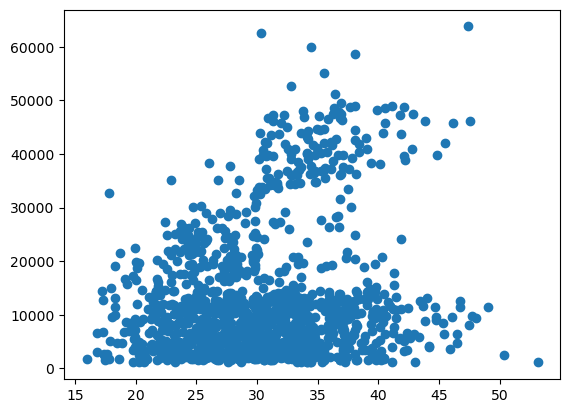

In [439]:
plt.scatter(df['bmi'],df['charges'])

In [440]:
df.shape

(1207, 7)

In [441]:
# feature encoding
# dummie encoding for region


df_new= pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1,27.900,0.0,1,16884.92400,False,False,False,True
1,18.0,0,33.770,1.0,0,1725.55230,False,False,True,False
2,28.0,0,33.000,3.0,0,4449.46200,False,False,True,False
3,33.0,0,22.705,0.0,0,21984.47061,False,True,False,False
4,32.0,0,28.880,0.0,0,3866.85520,False,True,False,False


In [442]:
df['region'].value_counts()

region
southeast    321
southwest    297
northeast    295
northwest    294
Name: count, dtype: int64

In [443]:
# for dummie encoding, norma practice is that we drop one column that counts the most, in this case would be southeast


df_new = df_new.drop(columns=['region_southeast'])
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,1,27.900,0.0,1,16884.92400,False,False,True
1,18.0,0,33.770,1.0,0,1725.55230,False,False,False
2,28.0,0,33.000,3.0,0,4449.46200,False,False,False
3,33.0,0,22.705,0.0,0,21984.47061,False,True,False
4,32.0,0,28.880,0.0,0,3866.85520,False,True,False


In [444]:
df_new['region_northeast'] = df_new['region_northeast'].astype('int64')
df_new['region_northwest'] = df_new['region_northwest'].astype('int64')
df_new['region_southwest'] = df_new['region_southwest'].astype('int64')
df_new.dtypes

age                 float64
sex                   int64
bmi                 float64
children            float64
smoker                int64
charges             float64
region_northeast      int64
region_northwest      int64
region_southwest      int64
dtype: object

In [445]:
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,1,27.900,0.0,1,16884.92400,0,0,1
1,18.0,0,33.770,1.0,0,1725.55230,0,0,0
2,28.0,0,33.000,3.0,0,4449.46200,0,0,0
3,33.0,0,22.705,0.0,0,21984.47061,0,1,0
4,32.0,0,28.880,0.0,0,3866.85520,0,1,0


In [446]:
# check coefficient

In [447]:
# check again, might not need to 
#numerical category 
# Detect Outliers

def detect_outliers(df, n, features):
    
    outlier_indices = []

    for col in features:
    
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        print(IQR)
        lower_bound = Q1- 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        print(lower_bound, upper_bound)
        outlier_list_col = df[(df[col] < lower_bound ) | (df[col] > upper_bound)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    print(f'outlier_indices:{outlier_indices},multiple_outliers:{multiple_outliers}' )
    return multiple_outliers




outliers_to_drop = detect_outliers(df, 2, ['age', 'bmi','children'])
print(f'we will drop these {len(outliers_to_drop)} indices', outliers_to_drop)

25.0
-11.5 88.5
8.39
13.604999999999997 47.165
2.0
-3.0 5.0
outlier_indices:Counter({116: 1, 286: 1, 401: 1, 543: 1, 847: 1, 860: 1, 1088: 1, 1317: 1}),multiple_outliers:[]
we will drop these 0 indices []


<Axes: >

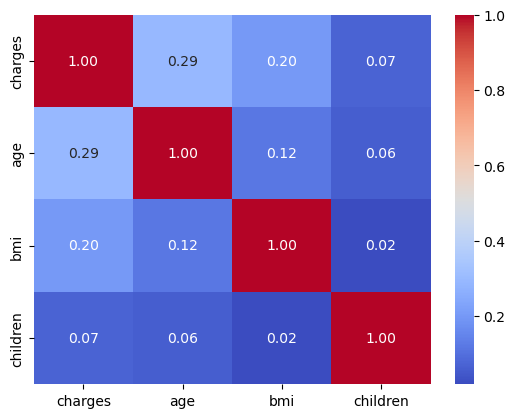

In [448]:
# numerical features correlation with charges

sns.heatmap(df[['charges','age','bmi','children']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
## seems age, bmi has positive/sustantial correlation, that seems make sense

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [450]:
X = df_new.drop(columns=['charges'], axis = 1)
y = df_new['charges']

In [451]:
#split data into trainig and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [452]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [453]:
#predict test data

y_predic = model.predict(X_test)

r2=r2_score(y_test, y_predic)


r2


0.7049323160872817

charges is continous numerical target variable, RogisticRegression is designed for classification problems will not use this model to train 

In [454]:
# lets try random forest as this model perform well in both continous or binary target variables

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [455]:
df_new1 = df_new.copy()

In [456]:
X = df_new1.drop(columns=['charges'], axis=1)
y = df_new1['charges']

In [457]:
#Split dataset into trainig and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [458]:
rf_regressor=RandomForestRegressor(

n_estimators= 100,
max_depth =None,
min_samples_split = 2,
min_samples_leaf = 1,
random_state=42



)

In [459]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [460]:
y_pred = rf_regressor.predict(X_test)


In [461]:
r2=r2_score(y_test, y_pred)
print(f'r2:{r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'mse:{mse}')

r2:0.8227484983250171
mse:23990511.58892256


In [462]:
# Gradient Boosting Regressor Example

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [463]:
df_new2 = df_new.copy()

In [464]:
X = df_new2.drop(columns='charges', axis=1)
y = df_new2['charges']

In [465]:
# split dataset into training, test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [466]:
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
    
)

gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [467]:
y_pred = gb_regressor.predict(X_test)

In [468]:
r2=r2_score(y_test, y_pred)
r2

0.8433562565922808

In [469]:
mse = mean_squared_error(y_test, y_pred)
mse

21201307.21626205

will use GradientBoostingRegressor, r2 is best

In [473]:
val_df= pd.read_csv(r'C:\Users\aan06\OneDrive - Blue Shield of California\Documents\Custom Office Templates\2025 Machine Learning\Healthcare Insurance Cost Insurance/validation_dataset.csv')

In [474]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB


In [475]:
val_df['region'].unique()

array(['southeast', 'northeast', 'northwest', 'southwest'], dtype=object)

In [476]:
val_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [477]:
val_df.query('children<0')

,age,sex,bmi,children,smoker,region


In [361]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [362]:
def preprocessor(df):

    df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
    df['sex'] = df['sex'].apply(lambda x: 1 if x == 'female' else 0)
    df= pd.get_dummies(df, prefix=['region'], columns=['region'])
    df = df.drop(columns=['region_southeast'],axis=1)
    df['region_northeast'] = df['region_northeast'].astype('int64')
    df['region_northwest'] = df['region_northwest'].astype('int64')
    df['region_southwest'] = df['region_southwest'].astype('int64')
    
    return df


In [363]:
validation_data = preprocessor(val_df)
validation_data.head(20)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southwest
0,18.0,1,24.090000,1.0,0,0,0,0
1,39.0,0,26.410000,0.0,1,1,0,0
2,27.0,0,29.150000,0.0,1,0,0,0
3,71.0,0,65.502135,13.0,1,0,0,0
4,28.0,0,38.060000,0.0,0,0,0,0
5,70.0,1,72.958351,11.0,1,0,0,0
6,29.0,1,32.110000,2.0,0,0,1,0
7,42.0,1,41.325000,1.0,0,1,0,0
8,48.0,1,36.575000,0.0,0,0,1,0
9,63.0,0,33.660000,3.0,0,0,0,0


In [364]:
predictions= gb_regressor.predict(validation_data)
predictions

array([ 4578.12487367, 20891.76978786, 18530.49680819, 71263.10261504,
        4700.12252433, 72630.7955328 ,  6854.30376914,  8206.98625012,
       10614.17526596, 16575.97252377,  5425.90989434, 16901.59212005,
       14906.23982203, 11828.26655784,  2922.57210718,  7166.21966713,
       30269.78899802, 72630.7955328 , 59887.77477889, 13488.33515769,
        2479.79232129, 11964.73193618, 38348.69981232, 10641.36689493,
        8058.89507781,  2717.13150657, 72921.88602712,  4810.68717049,
       14708.93440948,  9159.45916741,  6651.13637842, 35148.94109725,
       23843.37165952, 15065.18734172, 24989.87029911, 10227.64659579,
       72049.00914131, 13346.73573341,  5067.37445799, 29399.41657566,
       37985.24264772,  8759.9369043 ,  5540.14965361, 72049.00914131,
        5564.449727  , 49344.01177568, 71295.12706839, 39288.11969132,
       13727.86844209, 42473.39309413])

In [365]:
df_final_pred= pd.read_csv(r'C:\Users\aan06\OneDrive - Blue Shield of California\Documents\Custom Office Templates\2025 Machine Learning\Healthcare Insurance Cost Insurance/validation_dataset.csv')

In [366]:
df_final_pred.head(30)

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast
5,70.0,female,72.958351,11.0,yes,southeast
6,29.0,female,32.110000,2.0,no,northwest
7,42.0,female,41.325000,1.0,no,northeast
8,48.0,female,36.575000,0.0,no,northwest
9,63.0,male,33.660000,3.0,no,southeast


In [367]:
df_final_pred.shape

(50, 6)

In [368]:
df_final_pred['charges_predicted']=predictions
df_final_pred.head(60)

,age,sex,bmi,children,smoker,region,charges_predicted
0,18.0,female,24.090000,1.0,no,southeast,4578.124874
1,39.0,male,26.410000,0.0,yes,northeast,20891.769788
2,27.0,male,29.150000,0.0,yes,southeast,18530.496808
3,71.0,male,65.502135,13.0,yes,southeast,71263.102615
4,28.0,male,38.060000,0.0,no,southeast,4700.122524
5,70.0,female,72.958351,11.0,yes,southeast,72630.795533
6,29.0,female,32.110000,2.0,no,northwest,6854.303769
7,42.0,female,41.325000,1.0,no,northeast,8206.986250
8,48.0,female,36.575000,0.0,no,northwest,10614.175266
9,63.0,male,33.660000,3.0,no,southeast,16575.972524


In [370]:
df_final_pred.to_csv(r'C:\Users\aan06\OneDrive - Blue Shield of California\Documents\Custom Office Templates\2025 Machine Learning\Healthcare Insurance Cost Insurance\predict_output.csv', index=False)